In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os  
from matplotlib.ticker import PercentFormatter
from scipy.optimize import curve_fit
import csv

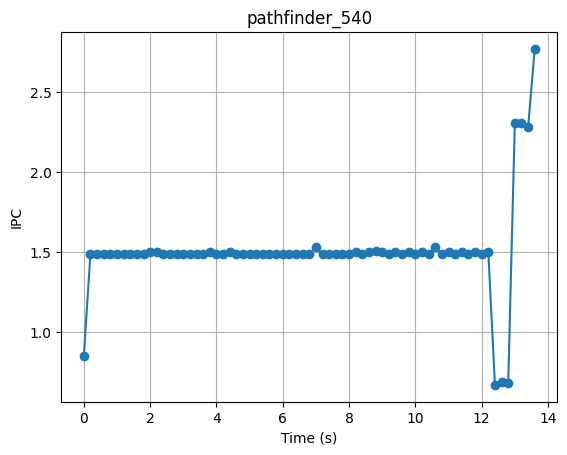

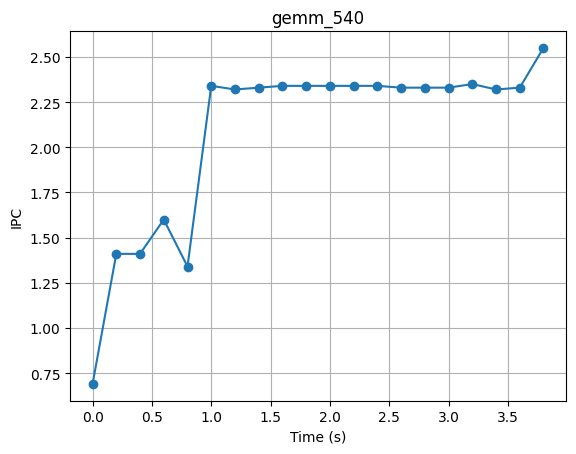

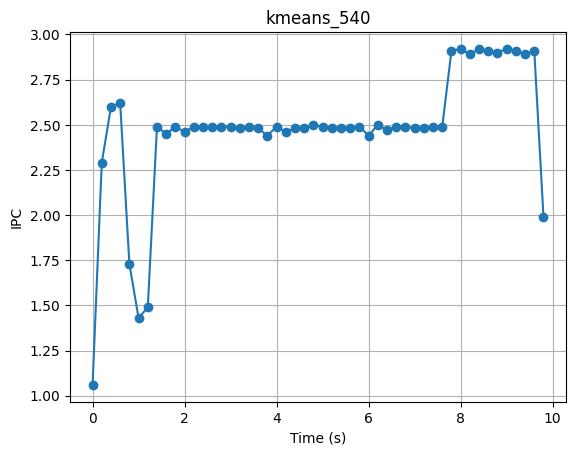

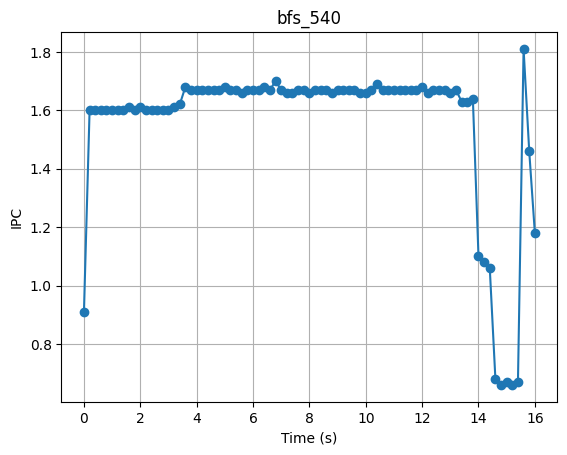

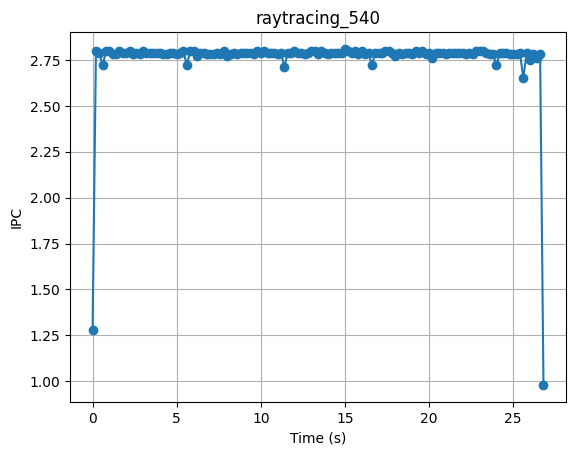

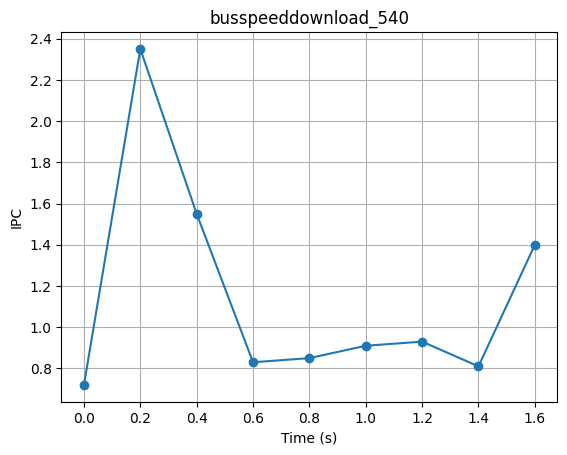

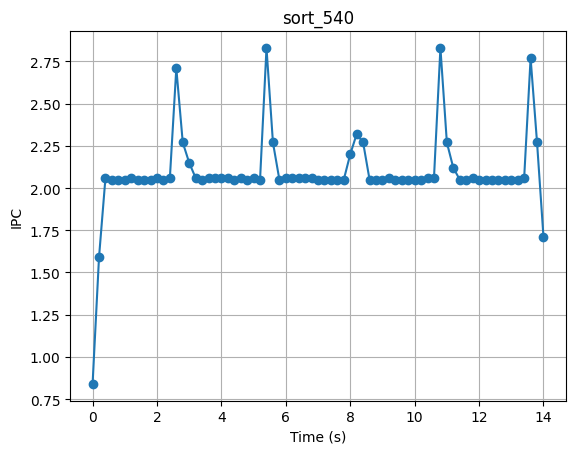

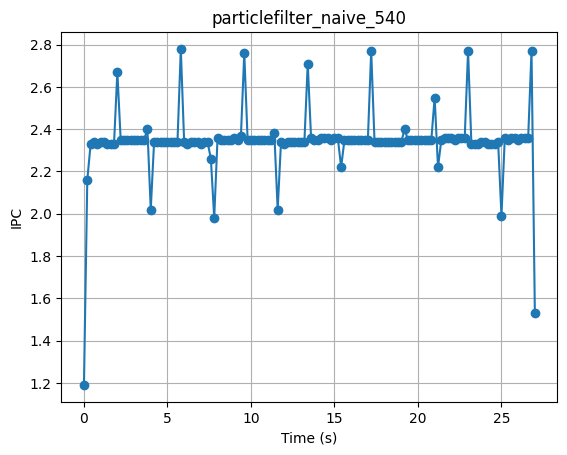

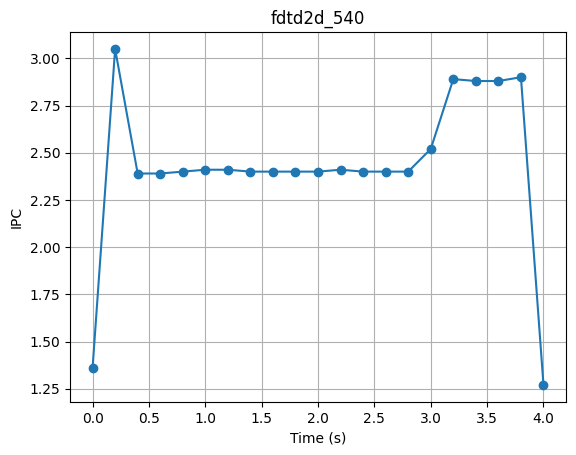

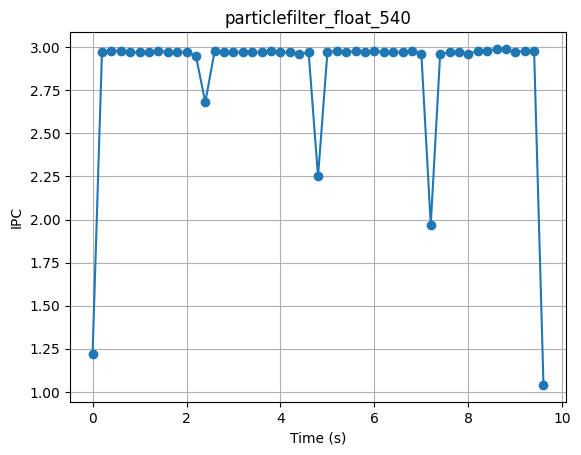

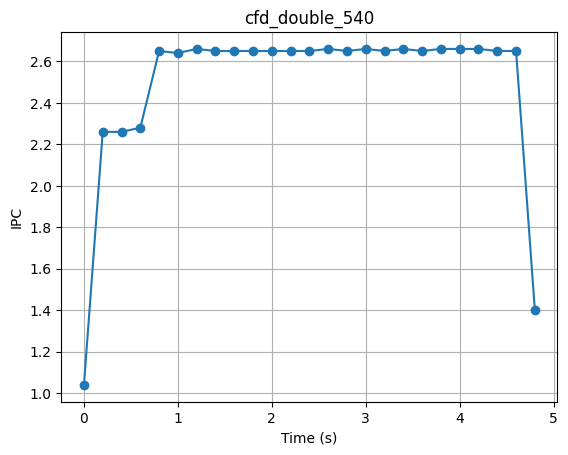

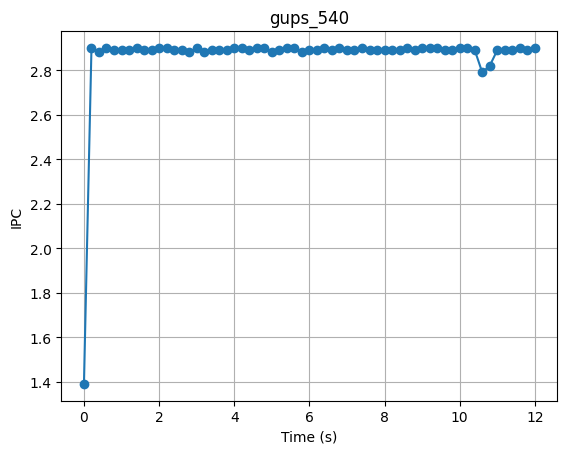

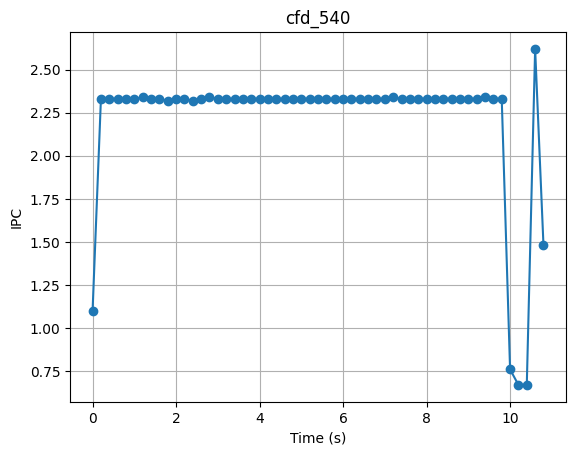

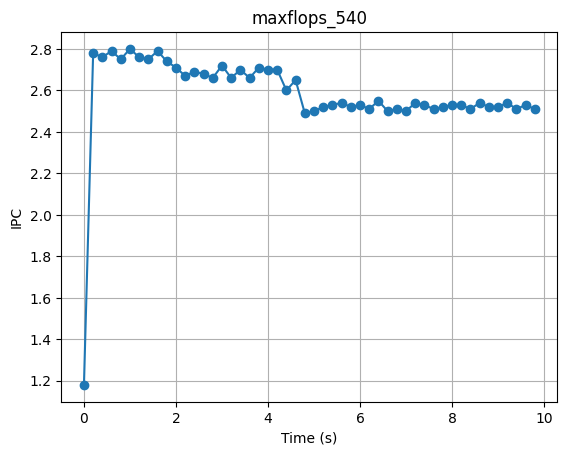

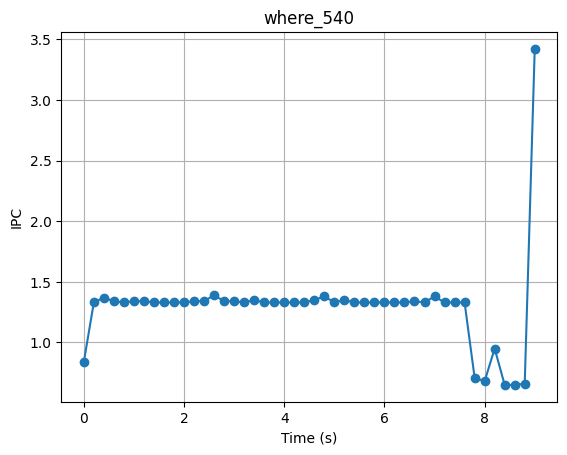

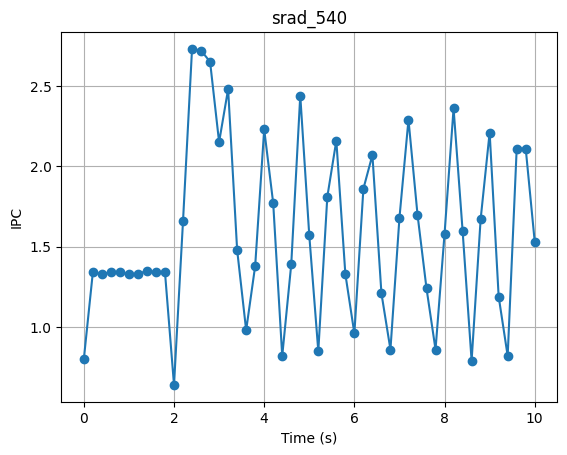

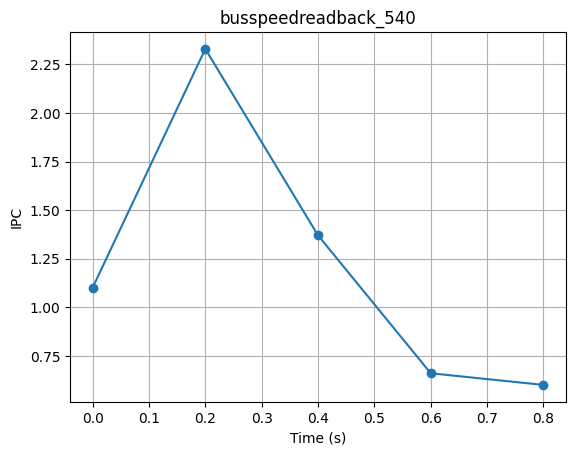

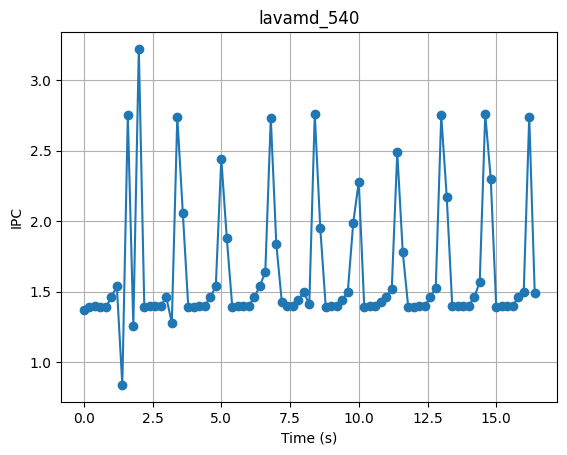

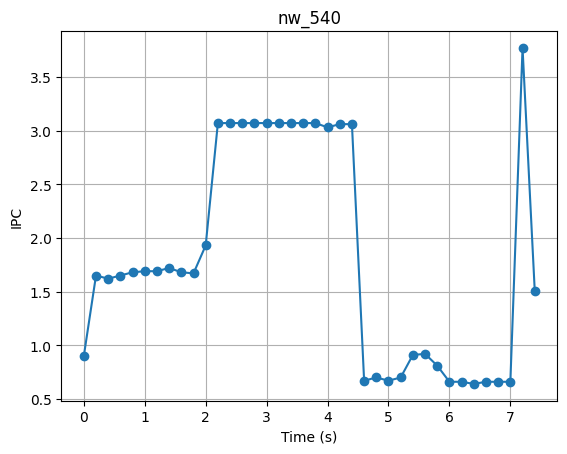

In [10]:
def plot_ipc(csv_files):
    for csv_file in csv_files:
        times = []
        ipc_values = []
        
        with open(csv_file, 'r') as file:
            reader = csv.reader(file)
            next(reader)  # Skip the header row
            
            for row in reader:
                times.append(float(row[0]))  # Time (s)
                ipc_values.append(float(row[1]))  # IPC

        # Extract the benchmark name from the file name
        benchmark_name = os.path.basename(csv_file).replace('ipc_', '').replace('.csv', '')

        # Plotting the IPC values over time
        plt.figure()
        plt.plot(times, ipc_values, marker='o')
        plt.title(f"{benchmark_name}")
        plt.xlabel("Time (s)")
        plt.ylabel("IPC")
        plt.grid(True)

def find_csv_files(directory):
    csv_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith("_540.csv") and file.startswith("ipc_"):
                csv_files.append(os.path.join(root, file))
    return csv_files


directory = "/home/cc/power/data/cpu_performance/altis"


# Find all CSV files under the directory
csv_files = find_csv_files(directory)

# Plot IPC values from the CSV files
plot_ipc(csv_files)
